In [1]:
import matplotlib.pyplot as plt
import cPickle as pickle
from core.solver import CaptioningSolver
from core.model import CaptionGenerator
from core.utils import load_coco_data
from core.bleu import evaluate

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)  # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [2]:
data = load_coco_data(data_path='./data', split='val')
with open('./data/train/word_to_idx.pkl', 'rb') as f:
    word_to_idx = pickle.load(f)

image_idxs <type 'numpy.ndarray'> (24221,) int32
captions <type 'numpy.ndarray'> (24221, 17) int32
features <type 'numpy.ndarray'> (5000, 196, 512) float32
file_names <type 'numpy.ndarray'> (5000,) |S29
Elapse time: 1.66


In [3]:
model = CaptionGenerator(word_to_idx, dim_feature=[196, 512], dim_embed=256,
                                   dim_hidden=1024, n_time_step=16, prev2out=True, 
                                             ctx2out=True, alpha_c=1.0, selector=True, dropout=False)

In [4]:
solver = CaptioningSolver(model, data, data, n_epochs=15, batch_size=32, update_rule='adam',
                                      learning_rate=0.001, print_every=300, save_every=20, image_path='./image/val2014_resized',
                                pretrained_model=None, model_path='./model/lstm', test_model='./model/lstm/model-12',
                                 print_bleu=False, log_path='./log/')

Sampled Caption: a white dog is sitting in the grass .


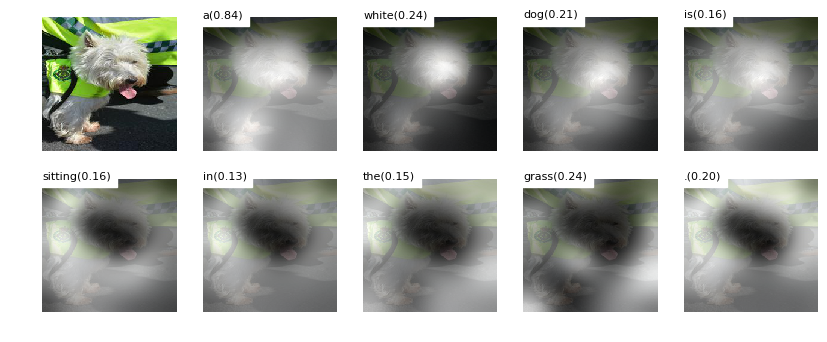

Sampled Caption: a group of people playing frisbee in a field .


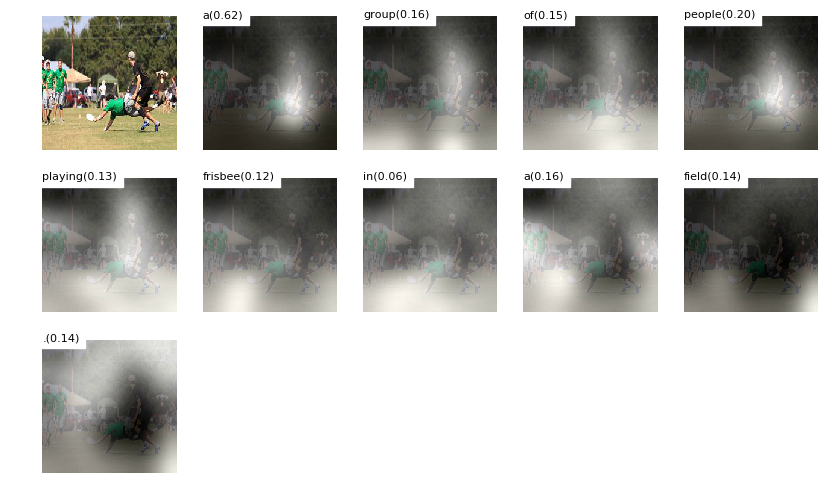

Sampled Caption: a group of people riding skis down a snow covered slope .


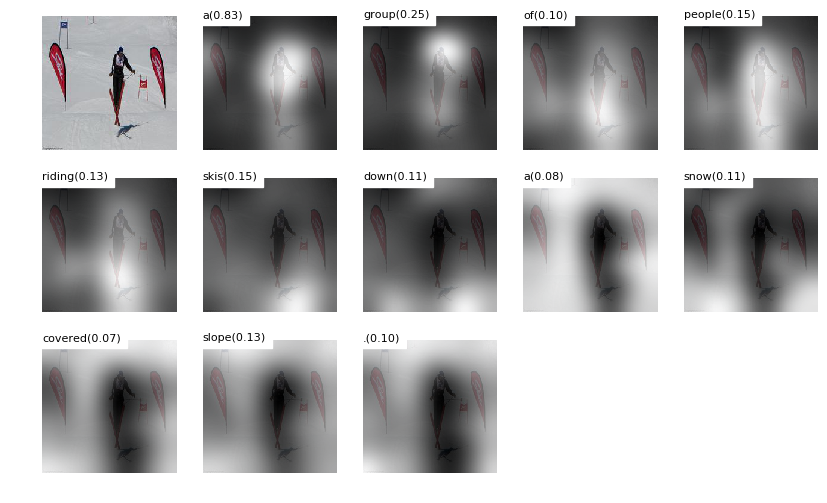

Sampled Caption: a man riding a skateboard up the side of a ramp .


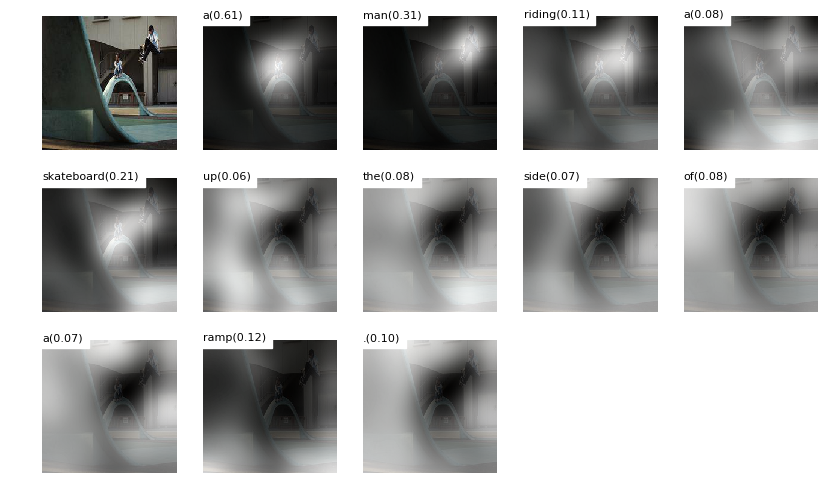

Sampled Caption: a man holding a cell phone in his hand .


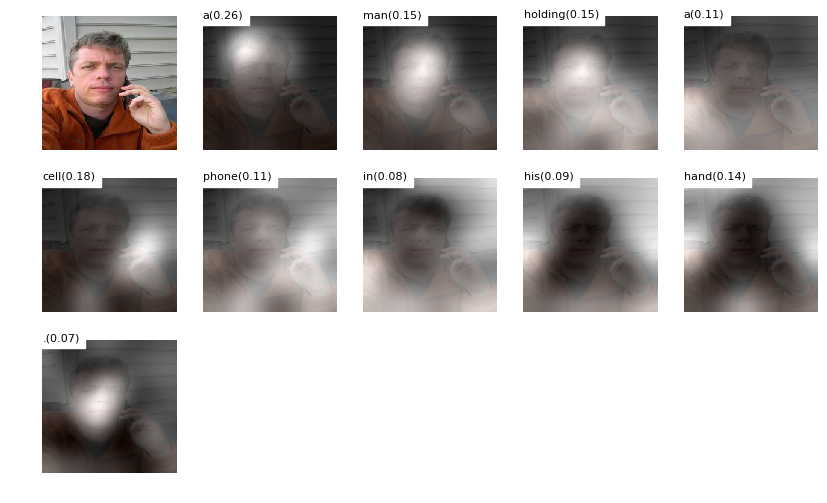

Sampled Caption: a bathroom with a toilet and a sink .


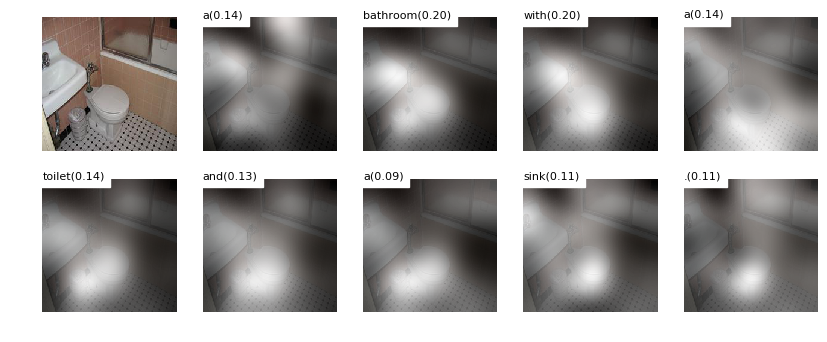

Sampled Caption: a zebra standing in a field of grass .


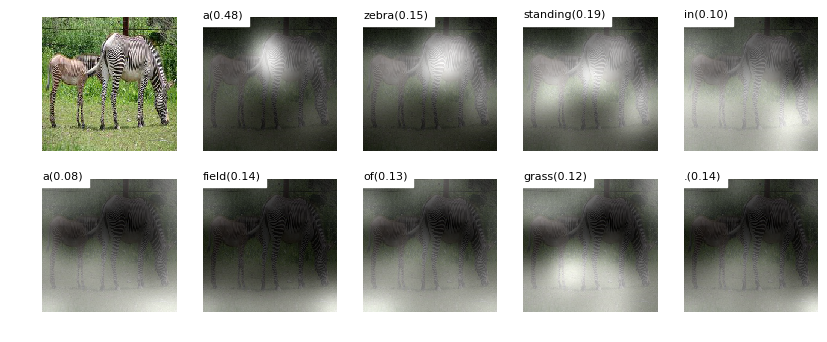

Sampled Caption: a plate with a pizza with a lot of toppings on it .


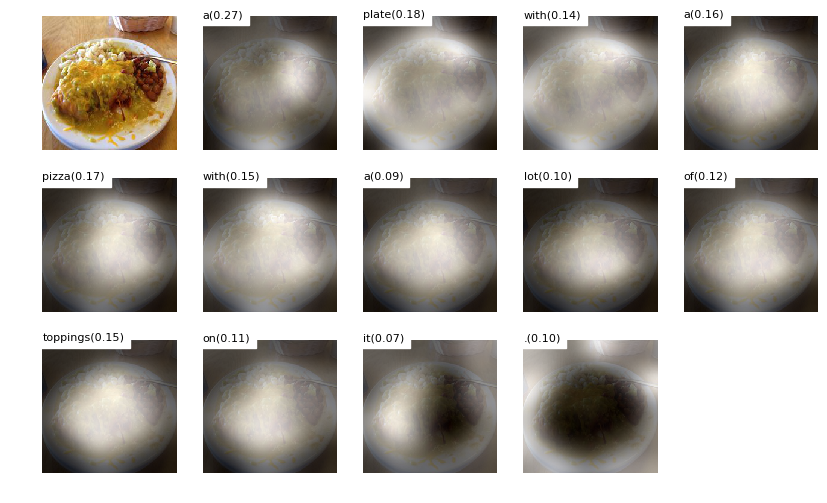

Sampled Caption: a large jetliner sitting on top of an airport runway .


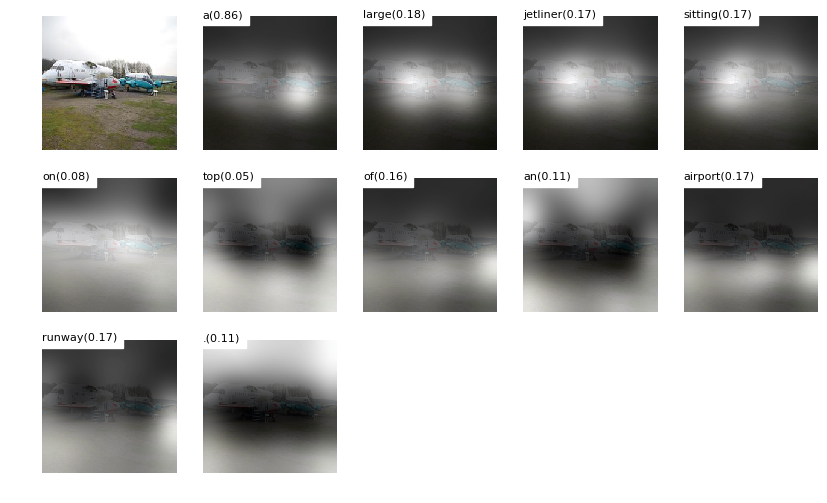

Sampled Caption: a blue and white airplane with a blue sky in the background .


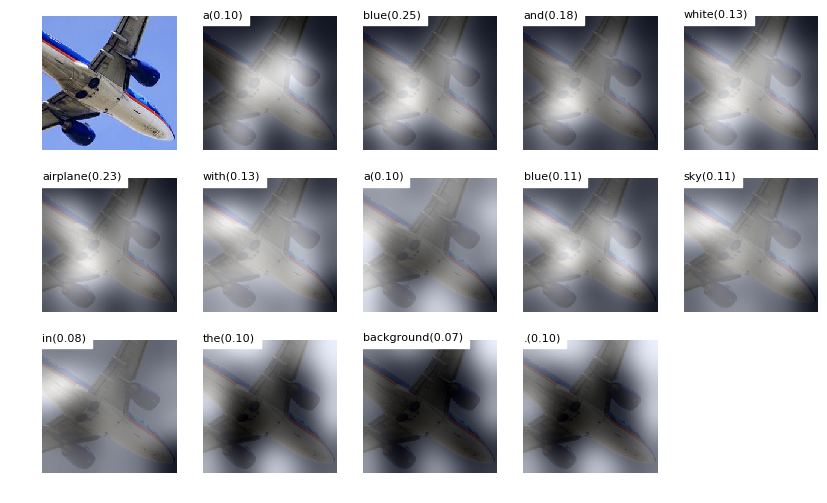

Saved ./data/val/val.candidate.captions.pkl..


In [5]:
solver.test(data, split='val')

In [6]:
evaluate(data_path='./data', split='val')

{'reflen': 53075, 'guess': [53602, 48602, 43602, 38602], 'testlen': 53602, 'correct': [35767, 15152, 6346, 2806]}
ratio: 1.00992934527
Bleu_1:	0.66726987799
Bleu_2:	0.456098527809
Bleu_3:	0.31167621849
Bleu_4:	0.216594395382
METEOR:	0.215320402831
ROUGE_L: 0.518036002702
CIDEr:	0.669694848281
